In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(f"TF version {tf.__version__}")

TF version 2.19.0


In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, Y = make_classification(
    n_samples=10000,n_features=20,n_informative=15,
    n_redundant=5,n_classes=2,random_state=42
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [22]:
X_train.shape

(7500, 20)

In [25]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    X_train, Y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7455 - loss: 0.4933 - val_accuracy: 0.9293 - val_loss: 0.2018
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9301 - loss: 0.1879 - val_accuracy: 0.9527 - val_loss: 0.1223
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9614 - loss: 0.1193 - val_accuracy: 0.9633 - val_loss: 0.1039
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.9699 - loss: 0.0944 - val_accuracy: 0.9673 - val_loss: 0.0968
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9740 - loss: 0.0836 - val_accuracy: 0.9633 - val_loss: 0.0977
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9823 - loss: 0.0704 - val_accuracy: 0.9660 - val_loss: 0.0903
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9855 - loss: 0.0589 - val_accuracy: 0.9693 - val_loss: 0.0833
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.9814 - loss: 0.0

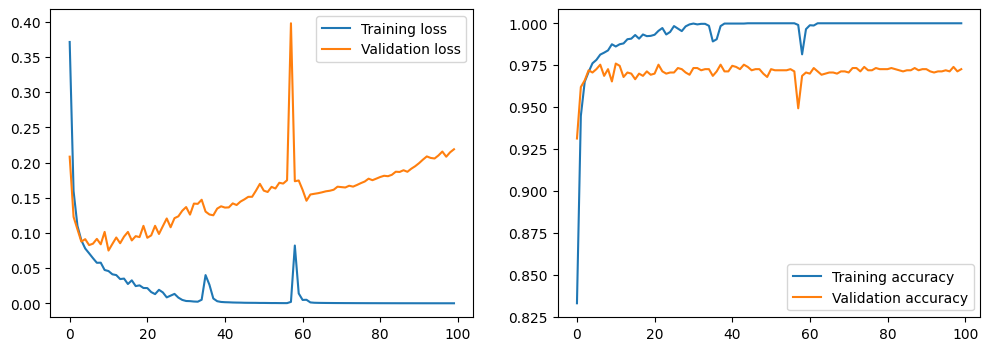

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(history.history['loss'], label="Training loss")
ax1.plot(history.history['val_loss'], label="Validation loss")
ax1.legend()

ax2.plot(history.history['accuracy'], label="Training accuracy")
ax2.plot(history.history['val_accuracy'], label="Validation accuracy")
ax2.legend()

plt.show()

